<a href="https://colab.research.google.com/github/PeymanKh/diabetes_classification/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import librraries
import pandas as pd

In [ ]:
# import data
diabetes = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')

In [ ]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Analysis

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

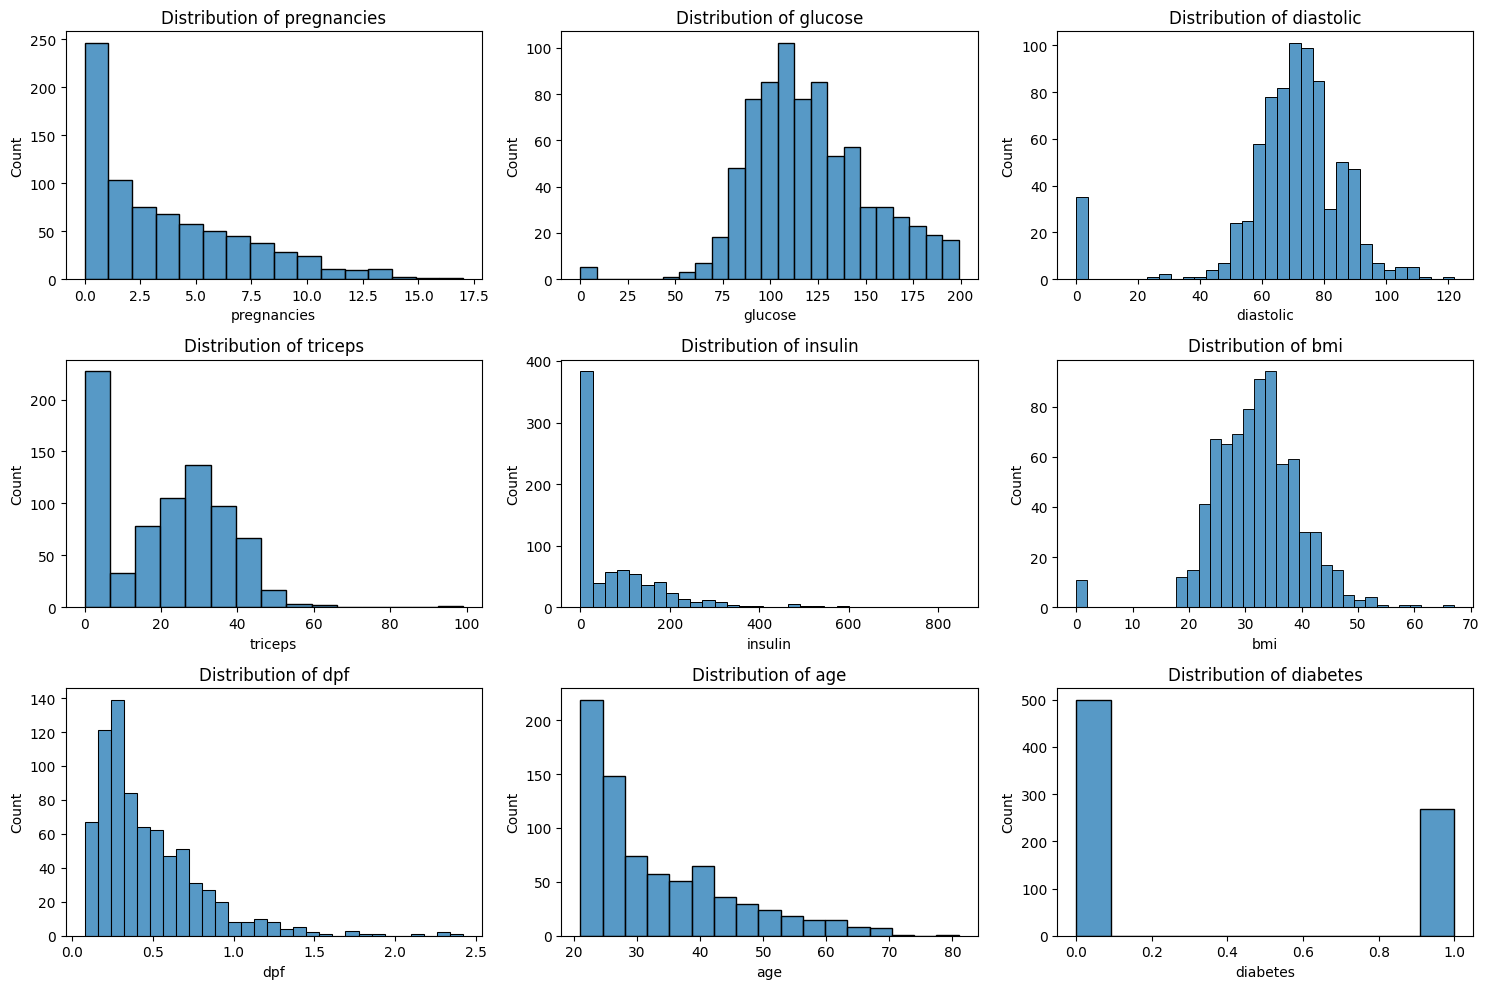

In [ ]:
# Create a figure with subplots arranged in rows
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through columns and create histograms
for i, column in enumerate(diabetes.columns):
    sns.histplot(data=diabetes, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create train annd test datasets
X = diabetes.drop(['diabetes'], axis=1)
y = diabetes['diabetes']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

In [ ]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [ ]:
# create the model
log_reg = LogisticRegression(max_iter=500)

In [ ]:
# training the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
log_reg.intercept_

array([-8.13045782])

In [ ]:
log_reg.coef_

array([[ 1.01246406e-01,  3.60547984e-02, -2.09737931e-02,
        -2.57336457e-03, -2.04620718e-04,  8.24718338e-02,
         9.51045046e-01,  2.53467630e-02]])

In [ ]:
# evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = log_reg.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

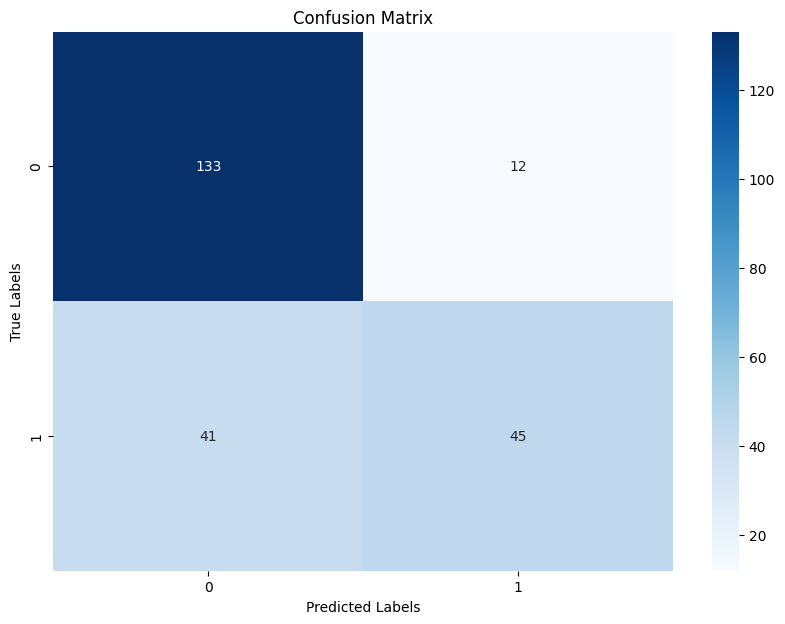

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
accuracy_score(y_test,y_pred)

0.7705627705627706

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       145
           1       0.79      0.52      0.63        86

    accuracy                           0.77       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

